<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [5]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




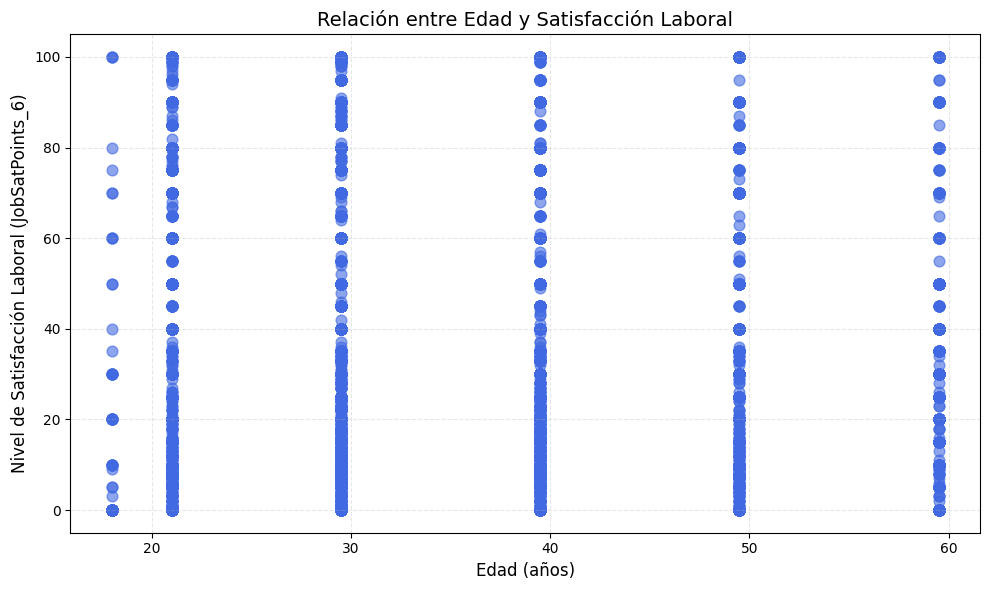

In [7]:
## Write your code here
# Activar modo inline si estás en notebook
%matplotlib inline

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Cargar columnas necesarias
QUERY = """
SELECT Age, JobSatPoints_6
FROM main
WHERE Age IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# --- LIMPIEZA DE LA COLUMNA AGE ---
def convert_age(x):
    if isinstance(x, str):
        x = x.replace("years old", "").replace(" ", "").strip()
        if '-' in x:
            parts = x.split('-')
            try:
                return (int(parts[0]) + int(parts[1])) / 2
            except:
                return None
        elif 'Under' in x:
            return 18
        elif 'Over' in x:
            return 70
        else:
            try:
                return float(x)
            except:
                return None
    return x

df['AgeNum'] = df['Age'].apply(convert_age)
df = df.dropna(subset=['AgeNum'])

# --- GRAFICAR SCATTER PLOT ---
plt.figure(figsize=(10,6))
plt.scatter(df['AgeNum'], df['JobSatPoints_6'], alpha=0.6, color='royalblue', s=60)

plt.title('Relación entre Edad y Satisfacción Laboral', fontsize=14)
plt.xlabel('Edad (años)', fontsize=12)
plt.ylabel('Nivel de Satisfacción Laboral (JobSatPoints_6)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


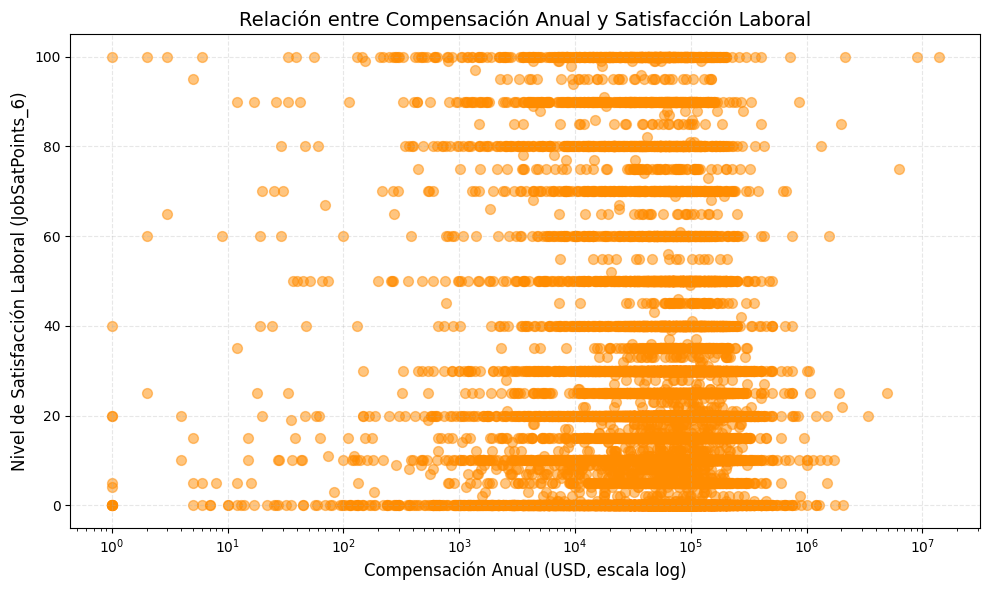

In [9]:
## Write your code here
# Activar modo inline si estás en Jupyter
%matplotlib inline

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Conectar a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Cargar las columnas necesarias
query = """
SELECT ConvertedCompYearly, JobSatPoints_6
FROM main
WHERE ConvertedCompYearly IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Filtrar valores no válidos (compensación positiva)
df = df[df['ConvertedCompYearly'] > 0]

# --- SCATTER PLOT ---
plt.figure(figsize=(10,6))
plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_6'],
            alpha=0.5, color='darkorange', s=50)

# Escala logarítmica en compensación (los sueldos varían mucho)
plt.xscale('log')

plt.title('Relación entre Compensación Anual y Satisfacción Laboral', fontsize=14)
plt.xlabel('Compensación Anual (USD, escala log)', fontsize=12)
plt.ylabel('Nivel de Satisfacción Laboral (JobSatPoints_6)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


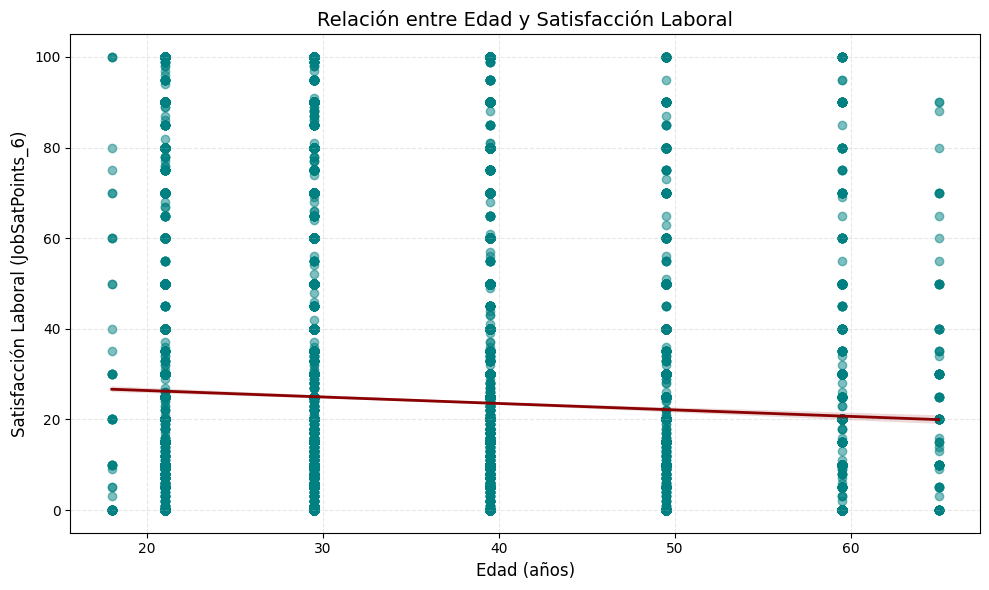

In [10]:
## Write your code here
# Activar modo inline si estás en Jupyter
%matplotlib inline

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conectar a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Cargar columnas relevantes
query = "SELECT Age, JobSatPoints_6 FROM main WHERE Age IS NOT NULL AND JobSatPoints_6 IS NOT NULL"
df = pd.read_sql_query(query, conn)

# --- CONVERTIR AGE A NÚMERICO ---
def convert_age(age_str):
    if isinstance(age_str, str):
        age_str = age_str.replace(" years old", "").strip()
        if "-" in age_str:
            # Tomar promedio de rango
            low, high = age_str.split("-")
            return (int(low) + int(high)) / 2
        elif "Under" in age_str:
            return 18
        elif "65" in age_str:
            return 65
        else:
            try:
                return int(age_str)
            except:
                return None
    return None

df["AgeNum"] = df["Age"].apply(convert_age)
df = df.dropna(subset=["AgeNum", "JobSatPoints_6"])

# --- SCATTER PLOT CON LÍNEA DE TENDENCIA ---
plt.figure(figsize=(10,6))
sns.regplot(data=df, x="AgeNum", y="JobSatPoints_6",
            scatter_kws={"alpha":0.5, "color":"teal"},
            line_kws={"color":"darkred", "lw":2})

plt.title("Relación entre Edad y Satisfacción Laboral", fontsize=14)
plt.xlabel("Edad (años)", fontsize=12)
plt.ylabel("Satisfacción Laboral (JobSatPoints_6)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


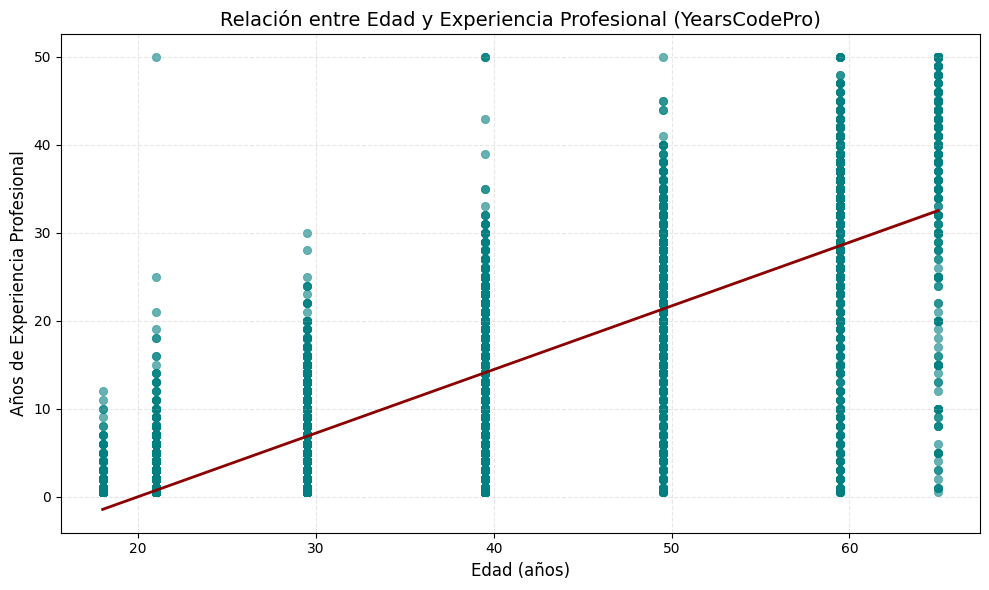

In [14]:
## Write your code here
# Activar modo inline si estás en Jupyter
%matplotlib inline

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conectar a la base de datos SQLite
conn = sqlite3.connect('survey-data.sqlite')

# Consultar las columnas relevantes
query = "SELECT Age, YearsCodePro FROM main WHERE Age IS NOT NULL AND YearsCodePro IS NOT NULL"
df = pd.read_sql_query(query, conn)

# --- CONVERTIR EDAD A NÚMEROS ---
def convert_age(age_str):
    if isinstance(age_str, str):
        age_str = age_str.replace(" years old", "").strip()
        if "-" in age_str:
            low, high = age_str.split("-")
            return (int(low) + int(high)) / 2
        elif "Under" in age_str:
            return 18
        elif "65" in age_str:
            return 65
        else:
            try:
                return int(age_str)
            except:
                return None
    return None

df["AgeNum"] = df["Age"].apply(convert_age)

# --- CONVERTIR AÑOS DE EXPERIENCIA A NÚMEROS ---
def convert_years(x):
    if isinstance(x, str):
        if x.lower().strip() in ["less than 1 year", "under 1 year"]:
            return 0.5
        elif x.lower().strip() in ["more than 50 years", "over 50 years"]:
            return 50
        else:
            try:
                return float(x)
            except:
                return None
    return x

df["YearsCodeProNum"] = df["YearsCodePro"].apply(convert_years)

# ✅ Eliminar filas sin datos válidos (paréntesis corregido)
df = df.dropna(subset=["AgeNum", "YearsCodeProNum"])

# --- SCATTER PLOT ---
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="AgeNum", y="YearsCodeProNum",
                alpha=0.6, color="teal", edgecolor=None)

# Línea de tendencia
sns.regplot(data=df, x="AgeNum", y="YearsCodeProNum",
            scatter=False, color="darkred", line_kws={"lw":2})

plt.title("Relación entre Edad y Experiencia Profesional (YearsCodePro)", fontsize=14)
plt.xlabel("Edad (años)", fontsize=12)
plt.ylabel("Años de Experiencia Profesional", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()



### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


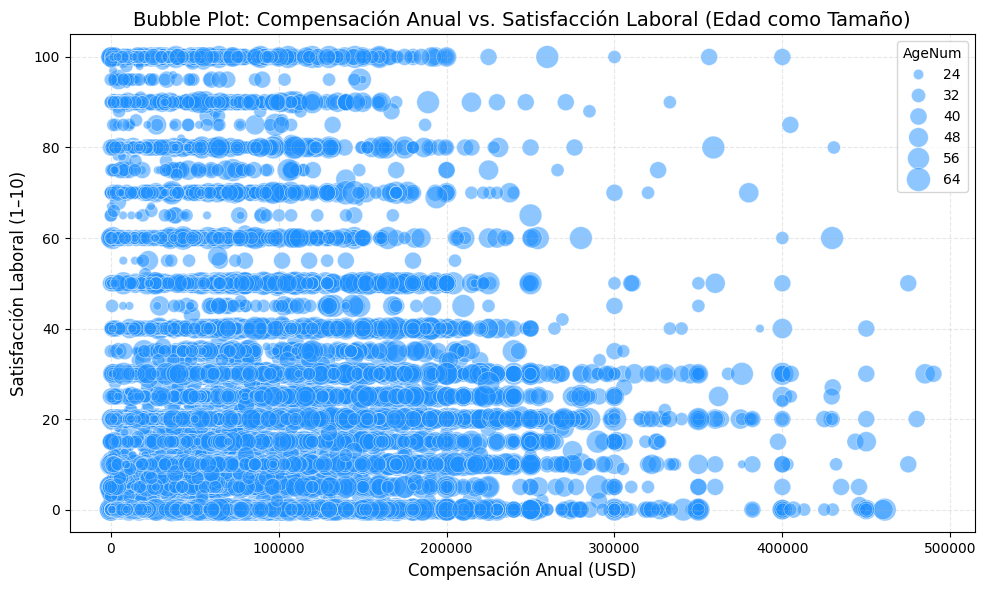

In [15]:
## Write your code here
# Activar modo inline si estás en Jupyter
%matplotlib inline

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conexión a la base de datos SQLite
conn = sqlite3.connect('survey-data.sqlite')

# Consultar datos necesarios
query = """
SELECT ConvertedCompYearly, JobSatPoints_6, Age
FROM main
WHERE ConvertedCompYearly IS NOT NULL 
  AND JobSatPoints_6 IS NOT NULL 
  AND Age IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# --- CONVERTIR EDAD A NÚMEROS ---
def convert_age(age_str):
    if isinstance(age_str, str):
        age_str = age_str.replace(" years old", "").strip()
        if "-" in age_str:
            low, high = age_str.split("-")
            return (int(low) + int(high)) / 2
        elif "Under" in age_str:
            return 18
        elif "65" in age_str:
            return 65
        else:
            try:
                return int(age_str)
            except:
                return None
    return None

df["AgeNum"] = df["Age"].apply(convert_age)

# --- LIMPIEZA DE DATOS ---
df = df.dropna(subset=["ConvertedCompYearly", "JobSatPoints_6", "AgeNum"])
df = df[df["ConvertedCompYearly"] < 500000]  # eliminar outliers extremos

# --- BUBBLE PLOT ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="ConvertedCompYearly",
    y="JobSatPoints_6",
    size="AgeNum",
    sizes=(20, 300),
    alpha=0.5,
    color="dodgerblue",
    edgecolor="white",
)

plt.title("Bubble Plot: Compensación Anual vs. Satisfacción Laboral (Edad como Tamaño)", fontsize=14)
plt.xlabel("Compensación Anual (USD)", fontsize=12)
plt.ylabel("Satisfacción Laboral (1–10)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


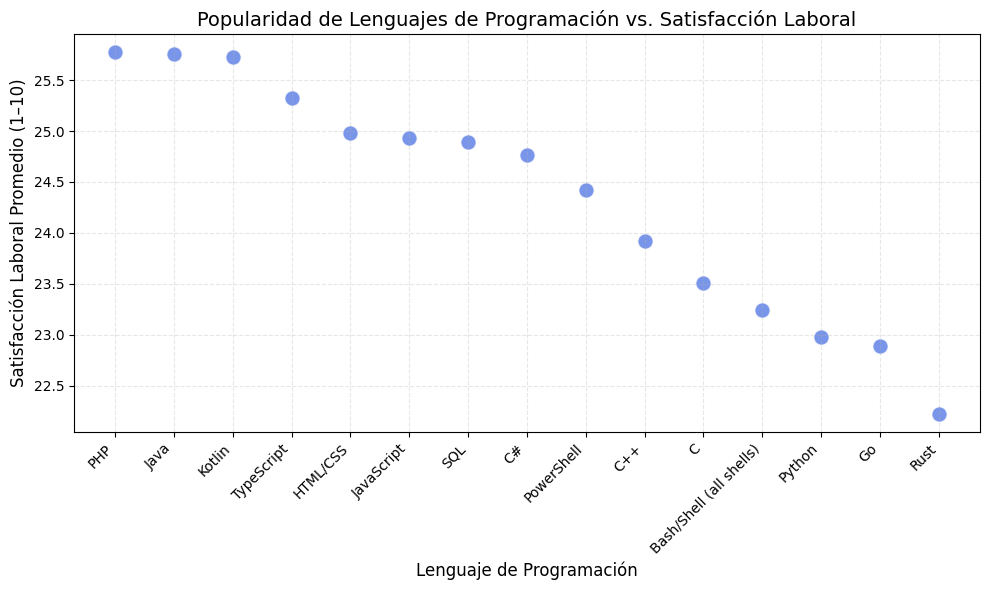

In [16]:
## Write your code here
# Activar modo inline si estás en Jupyter
%matplotlib inline

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conexión a la base de datos SQLite
conn = sqlite3.connect('survey-data.sqlite')

# Consultar las columnas necesarias
query = """
SELECT LanguageHaveWorkedWith, JobSatPoints_6
FROM main
WHERE LanguageHaveWorkedWith IS NOT NULL 
  AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# --- Separar los lenguajes individuales ---
# La columna LanguageHaveWorkedWith contiene múltiples lenguajes separados por ';'
df_expanded = df.assign(Language=df["LanguageHaveWorkedWith"].str.split(";"))
df_exploded = df_expanded.explode("Language")

# Limpiar espacios y valores nulos
df_exploded["Language"] = df_exploded["Language"].str.strip()
df_exploded = df_exploded.dropna(subset=["Language"])

# --- Calcular la satisfacción promedio por lenguaje ---
language_sat = (
    df_exploded.groupby("Language")["JobSatPoints_6"]
    .mean()
    .reset_index()
    .sort_values(by="JobSatPoints_6", ascending=False)
)

# --- Seleccionar los 15 lenguajes más mencionados para que el gráfico sea legible ---
top_languages = (
    df_exploded["Language"].value_counts().head(15).index
)
language_sat_top = language_sat[language_sat["Language"].isin(top_languages)]

# --- Crear gráfico de dispersión ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=language_sat_top,
    x="Language",
    y="JobSatPoints_6",
    s=120,
    color="royalblue",
    alpha=0.7,
    edgecolor="white"
)

plt.title("Popularidad de Lenguajes de Programación vs. Satisfacción Laboral", fontsize=14)
plt.xlabel("Lenguaje de Programación", fontsize=12)
plt.ylabel("Satisfacción Laboral Promedio (1–10)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


/tmp/ipykernel_299/3903779622.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


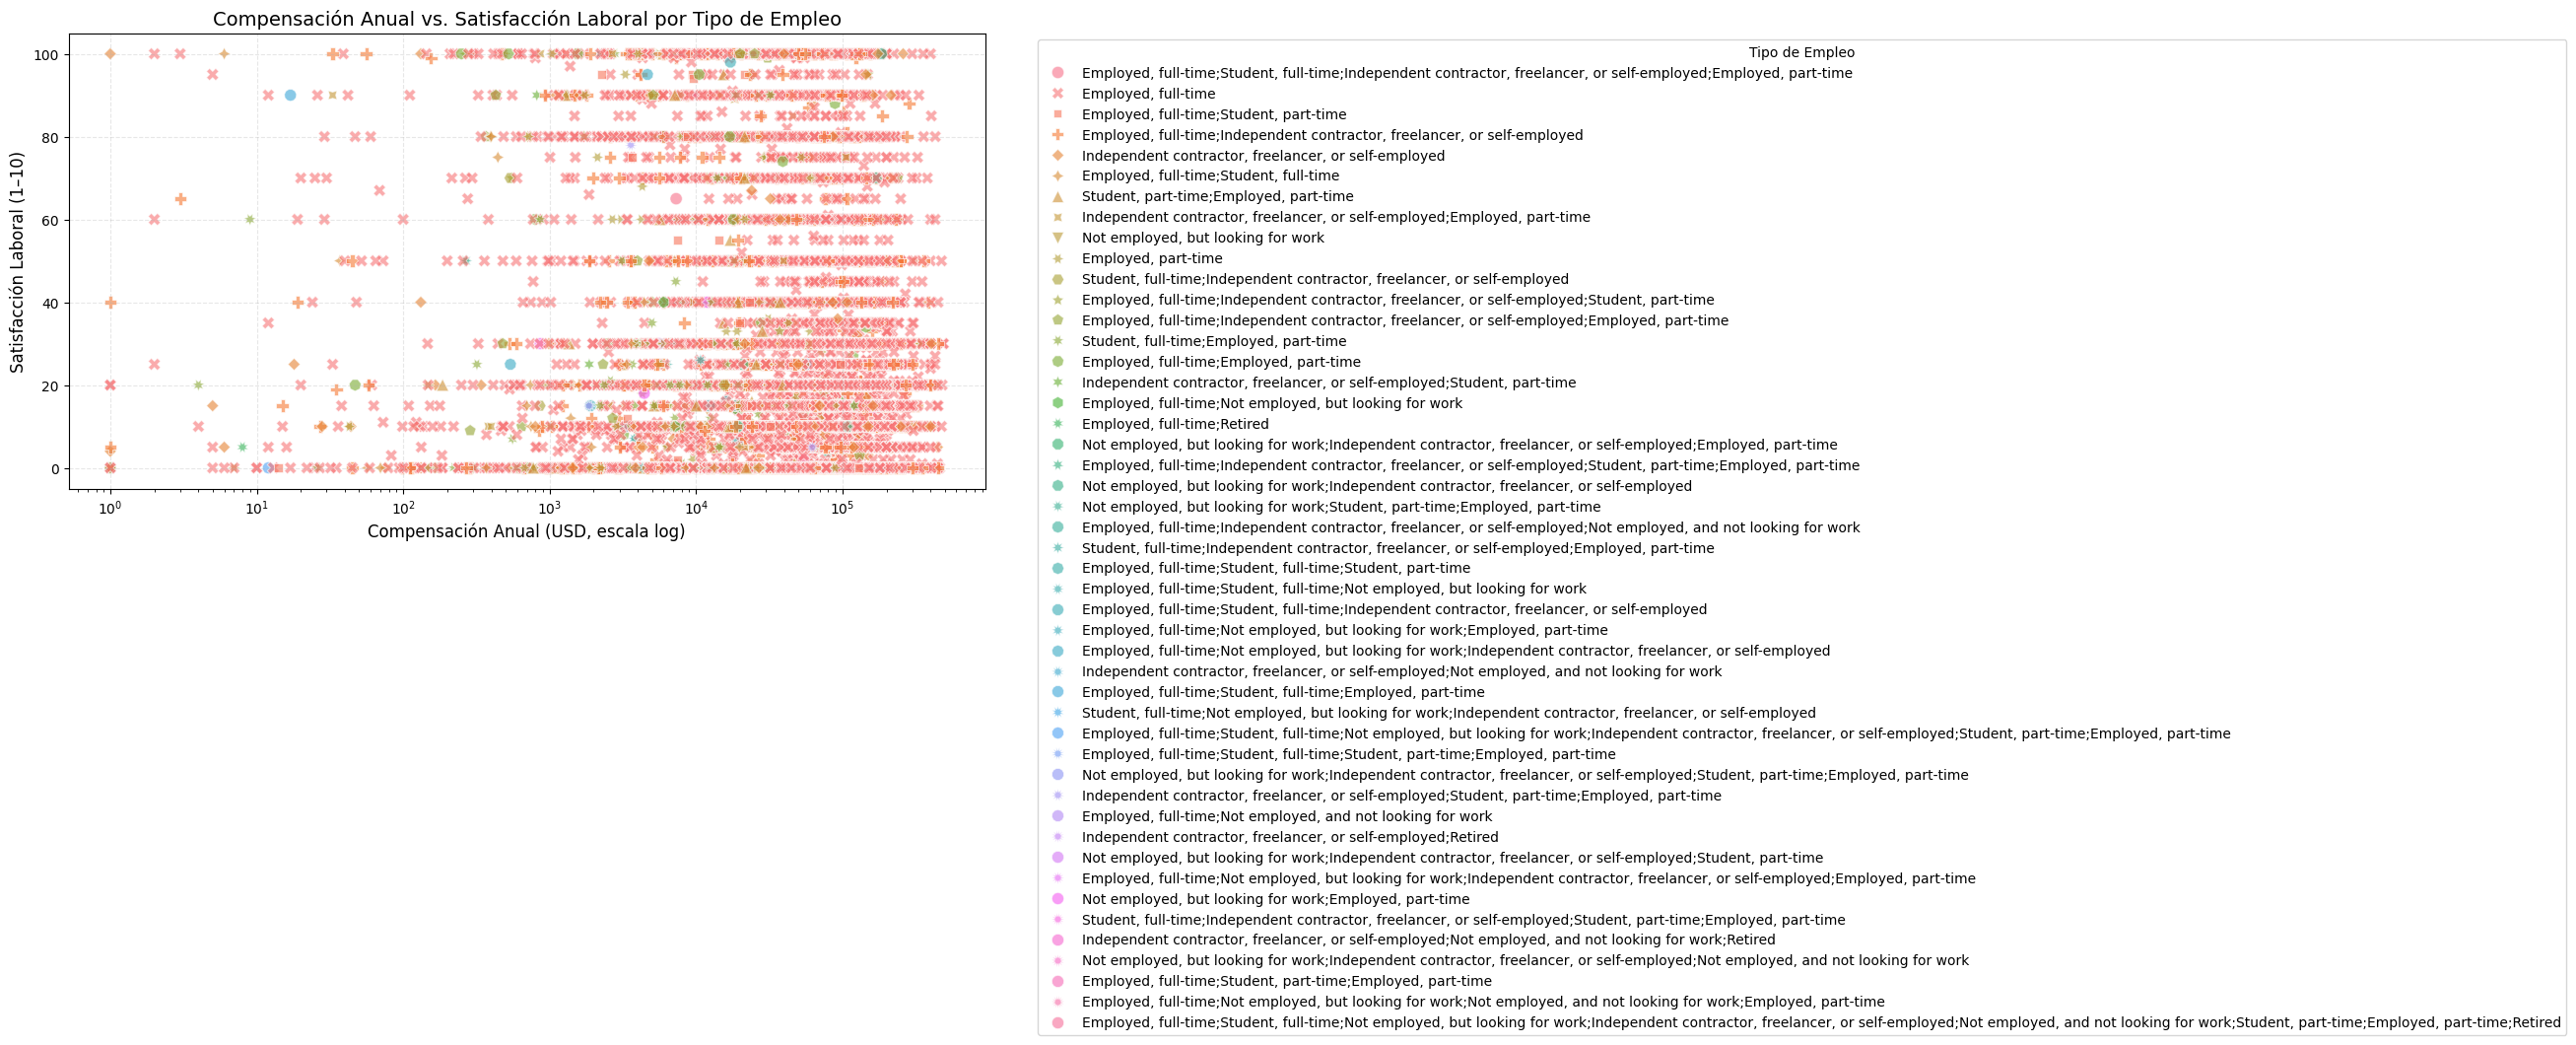

In [20]:
## Write your code here
# Activar modo inline en Jupyter
%matplotlib inline

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conexión a la base de datos SQLite
conn = sqlite3.connect('survey-data.sqlite')

# Consultar columnas necesarias
query = """
SELECT ConvertedCompYearly, JobSatPoints_6, Employment
FROM main
WHERE ConvertedCompYearly IS NOT NULL 
  AND JobSatPoints_6 IS NOT NULL
  AND Employment IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Filtrar valores extremos de compensación para mejorar visibilidad
df = df[df["ConvertedCompYearly"] > 0]
df = df[df["ConvertedCompYearly"] < 500000]  # eliminar outliers

# --- SCATTER PLOT CATEGORIZADO POR EMPLOYMENT ---
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x="ConvertedCompYearly",
    y="JobSatPoints_6",
    hue="Employment",      # color por tipo de empleo
    style="Employment",    # diferente marcador por tipo de empleo
    alpha=0.6,
    s=80
)

plt.xscale("log")  # Escala logarítmica para compensación
plt.title("Compensación Anual vs. Satisfacción Laboral por Tipo de Empleo", fontsize=14)
plt.xlabel("Compensación Anual (USD, escala log)", fontsize=12)
plt.ylabel("Satisfacción Laboral (1–10)", fontsize=12)
plt.legend(title="Tipo de Empleo", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


In [ ]:
## Write your code here

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
